In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
x = 2 * np.random.rand(100)
y = 4 + 3 * x + np.random.randn(100)

x_values = np.linspace(min(x), max(x), 100)
y_cand_1 = 3.5 * x_values + 3.2
y_cand_2 = 0.5 * x_values + 4

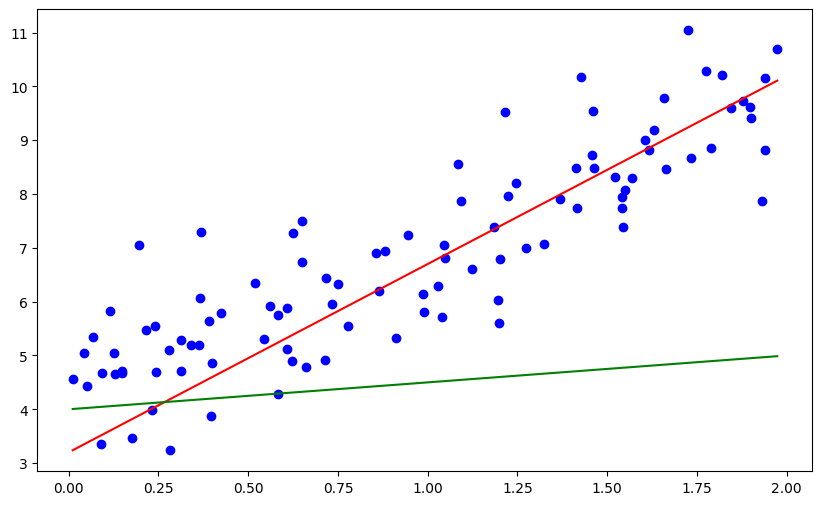

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue')
plt.plot(x_values, y_cand_1, color='red')
plt.plot(x_values, y_cand_2, color='green')
plt.show()

## Gradient Descent


In [4]:
def mse(y_true, y_pred):
    return np.mean(np.sum((y_true - y_pred) ** 2))
    

In [5]:
def grad_descent(x, y, iter=1000, lr=0.01, stopping_threshold=0.0001):
    slope = 0
    intercept = 0
    
    n = len(x)
    prev_cost = None

    for i in range(iter):
        y_pred = slope * x + intercept
        cost = mse(y, y_pred)

        if prev_cost and abs(cost - prev_cost) <= stopping_threshold:
            break

        prev_cost = cost

        slope_derivative = (1/n) * np.sum(x * (y - y_pred))
        intercept_derivative = (1/n) * np.sum(y - y_pred)

        slope -= lr * slope_derivative
        intercept -= lr * intercept_derivative

        print(f'Iteration {i+1}: Cost {cost}, Weight: slope={slope}, intercept={intercept}')

    return slope, intercept


In [6]:
slope, intercept = grad_descent(x, y)
print(f'Fianl parametres: slope={slope}, intercept={intercept}')

Iteration 1: Cost 5000.830364363712, Weight: slope=-0.07384082580524261, intercept=-0.06820004100101898
Iteration 2: Cost 5204.990111793521, Weight: slope=-0.14923472039288757, intercept=-0.13777645309942357
Iteration 3: Cost 5417.664943177786, Weight: slope=-0.22621380298077887, intercept=-0.20875760446688013
Iteration 4: Cost 5639.210154101145, Weight: slope=-0.30481085613879966, intercept=-0.2811724489935262
Iteration 5: Cost 5869.99586551728, Weight: slope=-0.38505933948741294, intercept=-0.3550505383830623
Iteration 6: Cost 6110.407642366719, Weight: slope=-0.4669934036790813, intercept=-0.4304220344976102
Iteration 7: Cost 6360.847138007715, Weight: slope=-0.550647904668407, intercept=-0.5073177219574962
Iteration 8: Cost 6621.732765537265, Weight: slope=-0.6360584182769542, intercept=-0.5857690210012231
Iteration 9: Cost 6893.500397124353, Weight: slope=-0.7232612550588401, intercept=-0.6658080006110029
Iteration 10: Cost 7176.60409252424, Weight: slope=-0.8122934754733034, inte

## Linear Regression

pip install scikit-learn

In [7]:
from sklearn.linear_model import LinearRegression

x_reshaped = x.reshape(-1, 1)

lin_reg = LinearRegression()
lin_reg.fit(x_reshaped, y)

lin_reg.coef_[0], lin_reg.intercept_

(2.7701133864384837, 4.215096157546747)

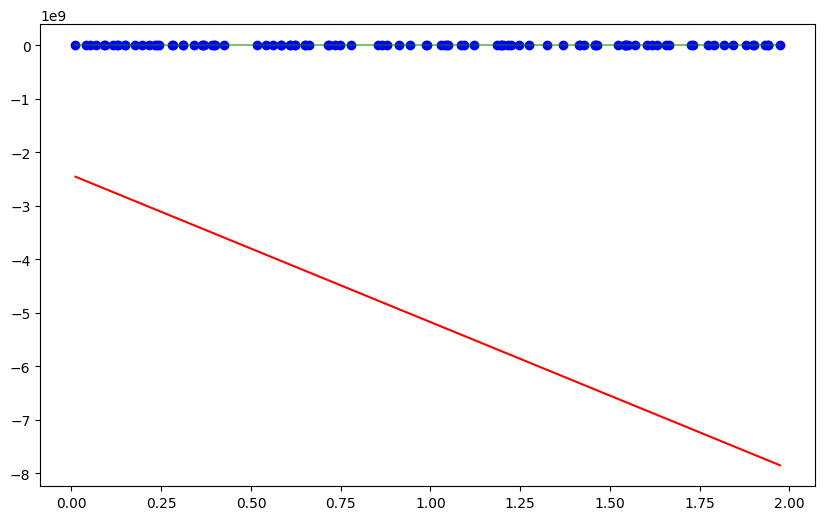

In [8]:
x_values = np.linspace(min(x), max(x), 100)
y_cand_1 = slope * x_values + intercept
y_cand_2 = lin_reg.coef_[0] * x_values + lin_reg.intercept_

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue')
plt.plot(x_values, y_cand_1, color='red')
plt.plot(x_values, y_cand_2, color='green', alpha=0.5)
plt.show()